## Exercise MovieLens 电影数据分析

### 作业要求：（单人组）

__Task1__：在movielens 1M的数据集上，统计分析观影的性别偏好。

需要完成：

综合观影信息、评分信息，设计合理方案分别筛选出前20部比较流行的（rating > 300）男性/女性 偏好电影。

针对不同类型的电影（genres），统计分析男/女偏好程度（需要做归一化），通过双色直方图对比显示。



__Task2__：在 movielens 1M的数据集上，通过观影及评分信息，预测观众的年龄-性别

需要完成：

拆分训练集-测试集（20%评测），实现评测方案（准确率-召回率）

实现分类器模型，对观影数超过100的用户进行预测。调整模型及参数。包括并不限于特征降维来获得较好的效果。（提示：在用户年龄预测问题中，由于年

龄段本身是具有序关系的。常规的模型优化方法不一定会有明显的效果， 有兴趣的同学可以看一下ordinal regression模型。有余力可以尝试，不算分。）


__Task3__：在movielens 1M的数据集上，通过观影-评分及电影简介等信息，对观影>100的用户实现用户画像。

包括且不限于：最喜欢-最不喜欢的电影类型。输出3-5部代表性的电影反映该用户的观影偏好。（可以通过对偏好的电影集合运用图分析技术或SVD分解来实现）

⾃定义⼀些合理的类型概 念，如，家庭主妇最爱，烧脑神剧等，对用户进行标签标记。或者综合电影风格，生成用户观影偏好的雷达图。生成用户偏好词云
等。


#### 读取moivelens 1M 数据（data目录）

- 1. user， movies， rating三个表

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
# Reading ratings file
ratings = pd.read_csv('data/ratings2.csv',  encoding='latin-1', usecols=['user_id', 'movie_id', 'rating', 'timestamp'])

# Reading users file
users = pd.read_csv('data/users.csv', encoding='latin-1', usecols=['user_id', 'gender', 'zipcode', 'age_desc', 'occ_desc'])

# Reading movies file
movies = pd.read_csv('data/movies.csv',  encoding='latin-1', usecols=['movie_id', 'title', 'genres'])

In [66]:
print(ratings[0:5])
print(users[0:5])
print(movies[0:5])

   user_id  movie_id  rating  timestamp
0        1      1193       5  978300760
1        1       661       3  978302109
2        1       914       3  978301968
3        1      3408       4  978300275
4        1      2355       5  978824291
   user_id gender zipcode  age_desc              occ_desc
0        1      F   48067  Under 18          K-12 student
1        2      M   70072       56+         self-employed
2        3      M   55117     25-34             scientist
3        4      M   02460     45-49  executive/managerial
4        5      M   55455     25-34                writer
   movie_id                               title                        genres
0         1                    Toy Story (1995)   Animation|Children's|Comedy
1         2                      Jumanji (1995)  Adventure|Children's|Fantasy
2         3             Grumpier Old Men (1995)                Comedy|Romance
3         4            Waiting to Exhale (1995)                  Comedy|Drama
4         5  Father of

In [67]:
# a = data_mat_freq @ data_mat_freq.T  # 20分钟
# np.save("data/movie_coRating_count",a ) #保存数组
# a[0]
# 该数组在data目录里作为环数据境下发，可以直接使用

In [68]:
# Reading movies info file
movies_info = pd.read_csv('data/info.csv',  encoding='latin-1', usecols=['id', 'name', 'genre','intro','directors','starts', 'release_time'])
movies_info.rename(columns ={ 'id':'movie_id', 'starts': 'stars'}, inplace = True)

In [69]:
movies_info

movie_id                                        name  \
0            1                           Toy Story (1995)    
1            2                             Jumanji (1995)    
2            3                    Grumpier Old Men (1995)    
3            4                   Waiting to Exhale (1995)    
4            5         Father of the Bride Part II (1995)    
...        ...                                         ...   
9737    193581  Kuroshitsuji: Book of the Atlantic (2017)    
9738    193583             NÃ´gÃªmu nÃ´raifu: Zero (2017)    
9739    193585                               Flint (2017)    
9740    193587       Bungou Stray Dogs: Dead Apple (2018)    
9741    193609                          Dice Rules (1991)    

                           genre              release_time  \
0     Animation|Adventure|Comedy    22 November 1995 (USA)   
1        Adventure|Comedy|Family    15 December 1995 (USA)   
2                 Comedy|Romance    22 December 1995 (USA)   
3           Comedy|Drama|Romance    22 December 1995 (USA)   
4          Comedy|Family|Romance     8 December 1995 (USA)   
...                          ...                       ...   
9737                   Animation   21 January 2017 (Japan)   
9738  Animation|Adventure|Comedy      19 July 2019 (China)   
9739                       Drama  TV Movie 28 October 2017   
9740                   Animation      3 March 2018 (Japan)   
9741          Comedy|Documentary         17 May 1991 (USA)   

                                                  intro  \
0     A cowboy doll is profoundly threatened and jea...   
1     When two kids find and play a magical board ga...   
2     John and Max resolve to save their beloved bai...   
3     Based on Terry McMillan's novel, this film fol...   
4     George Banks must deal not only with the pregn...   
...                                                 ...   
9737  A young lord and his demon butler board a luxu...   
9738  Adaption of the sixth Light Novel of series, i...   
9739  A woman deals with the toxic water scandal in ...   
9740  Rivalry between groups of criminals and detect...   
9741  Outrageous, misogynistic and vulgar-to-the-max...   

                      directors  \
0                 John Lasseter   
1                  Joe Johnston   
2                 Howard Deutch   
3               Forest Whitaker   
4                 Charles Shyer   
...                         ...   
9737  Noriyuki Abe|Stephen Hoff   
9738            Atsuko Ishizuka   
9739            Bruce Beresford   
9740            Takuya Igarashi   
9741                  Jay Dubin   

                                                  stars  
0                       Tom Hanks|Tim Allen|Don Rickles  
1              Robin Williams|Kirsten Dunst|Bonnie Hunt  
2                Walter Matthau|Jack Lemmon|Ann-Margret  
3         Whitney Houston|Angela Bassett|Loretta Devine  
4                Steve Martin|Diane Keaton|Martin Short  
...                                                 ...  
9737   Bryn Apprill|Dawn Michelle Bennett|Justin Briner  
9738  Alexandra Bedford|Jessica Boone|Ricardo Contreras  
9739           Marin Ireland|Betsy Brandt|Queen Latifah  
9740               Brian Beacock|Ray Chase|Lucien Dodge  
9741       Andrew Dice Clay|Eddie Griffin|Sylvia Harman  

[9742 rows x 7 columns]

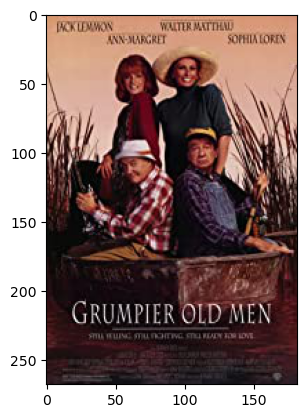

In [70]:
import matplotlib.pyplot as plt
import cv2 
poster_i = cv2.imread('data/poster/3.jpg',cv2.IMREAD_COLOR)
poster_i = cv2.cvtColor(poster_i, cv2.COLOR_BGR2RGB)
plt.imshow(poster_i)  

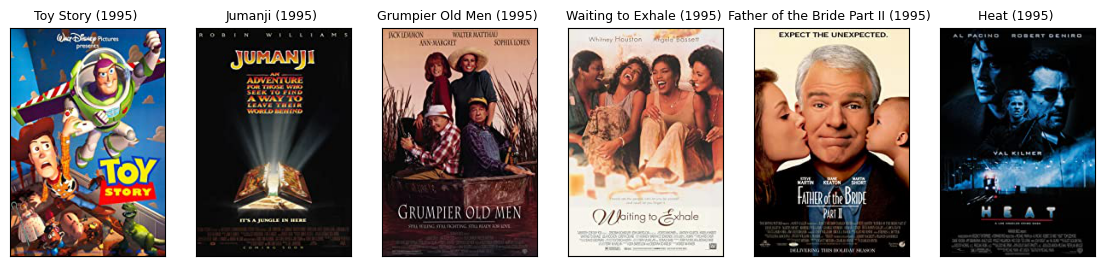

In [71]:
plt.figure(figsize=(14,10))
for i in movies_info[:6]['movie_id']:
    plt.subplot(1, 6, i)
    poster_i = cv2.imread('data/poster/'+ str(i) + '.jpg', 1)
    poster_i = cv2.cvtColor(poster_i, cv2.COLOR_BGR2RGB)
    plt.imshow(poster_i)
    plt.title(movies_info.iloc[i-1]['name'], size=9)
    plt.xticks(())
    plt.yticks(())
plt.show()

### Task 1:

在movielens 1M的数据集上，统计分析观影的性别偏好。

需要完成：

综合观影信息、评分信息，设计合理方案分别筛选出前20部比较流行的（rating > 300）男性/女性 偏好电影。

针对不同类型的电影（genres），统计分析男/女偏好程度（需要做归一化），通过双色直方图对比显示。


In [72]:
# 统计用户性别分布
users_gender_count=users["gender"].value_counts()
print("Users gender distribution:\n", users_gender_count)


Users gender distribution:
 M    4331
F    1709
Name: gender, dtype: int64


In [73]:
# 筛选出评分数大于 300 的电影
movie_rating_count=ratings["movie_id"].value_counts()
popular_movies_id=movie_rating_count[movie_rating_count>300]
popular_movies=movies[movies["movie_id"].isin(popular_movies_id)]
print("Popular Movies:")
display(popular_movies[0:5])

Popular Movies:


movie_id                                  title                    genres
298       301                   Picture Bride (1995)             Drama|Romance
299       302  Queen Margot (La Reine Margot) (1994)             Drama|Romance
300       303         Quick and the Dead, The (1995)  Action|Adventure|Western
301       304                       Roommates (1995)              Comedy|Drama
302       305   Ready to Wear (Pret-A-Porter) (1994)                    Comedy

In [74]:
# 分别统计男性和女性观众对电影的平均评分，筛选出前 20 部男性/女性偏好的电影
## 筛选出流行电影的评分信息
popular_movie_rating=pd.merge(ratings,popular_movies,on="movie_id")
## 将其评分信息与用户信息合并
popular_movie_user_rating=pd.merge(popular_movie_rating,users,on='user_id')
## 计算出男性/女性观众对某部电影的平均评分
average_ratings=popular_movie_user_rating.groupby(["gender","movie_id"])["rating"].mean().unstack()
print("Average ratings:")
display(average_ratings)
## 取出男性/女性用户评分最高的 20 部电影
M_prefer_movies_id=average_ratings.loc["M"].sort_values(ascending=False)[:20]
F_prefer_movies_id=average_ratings.loc["F"].sort_values(ascending=False)[:20]
M_prefer_movies=pd.merge(M_prefer_movies_id,movies,on='movie_id').rename(columns={'M':'M_average_rating'})
F_prefer_movies=pd.merge(F_prefer_movies_id,movies,on='movie_id').rename(columns={'F':'F_average_rating'})
print("Male prefer these movies:")
display(M_prefer_movies)
print("Female prefer these movies:")
display(F_prefer_movies)

Average ratings:


movie_id      301       302       303       304       305       306   \
gender                                                                 
F         3.368421  3.916667  3.042553  2.888889  2.452381  4.243478   
M         3.250000  3.684211  2.967655  3.230769  2.529412  4.219178   

movie_id      307       308    309       310   ...      2578      2583  \
gender                                         ...                       
F         4.108434  3.985507  3.625  2.333333  ...  3.000000  3.519481   
M         4.093750  3.954887  3.750  3.000000  ...  3.666667  3.651899   

movie_id      2590      2649      2653      2672      2883      2990  \
gender                                                                 
F         3.153846  3.333333  3.000000  3.132353  3.530120  3.196078   
M         2.909091  3.320755  2.714286  3.201238  3.556701  3.200599   

movie_id      2991      3428  
gender                        
F         3.375000  3.214286  
M         3.625683  2.866667  

[2 rows x 575 columns]

Male prefer these movies:


movie_id  M_average_rating  \
0        989          5.000000   
1        598          4.666667   
2        318          4.560625   
3        578          4.500000   
4        557          4.500000   
5        527          4.491415   
6       1148          4.478261   
7        745          4.473795   
8        750          4.464789   
9        912          4.461340   
10      1193          4.418423   
11       913          4.410891   
12       923          4.407895   
13       908          4.390641   
14       720          4.385075   
15       593          4.381944   
16      1207          4.372611   
17      1136          4.363272   
18      1254          4.348901   
19       682          4.333333   

                                                title  \
0           Schlafes Bruder (Brother of Sleep) (1995)   
1                              Window to Paris (1994)   
2                    Shawshank Redemption, The (1994)   
3                         Hour of the Pig, The (1993)   
4                                   Mamma Roma (1962)   
5                             Schindler's List (1993)   
6                          Wrong Trousers, The (1993)   
7                               Close Shave, A (1995)   
8   Dr. Strangelove or: How I Learned to Stop Worr...   
9                                   Casablanca (1942)   
10             One Flew Over the Cuckoo's Nest (1975)   
11                         Maltese Falcon, The (1941)   
12                                Citizen Kane (1941)   
13                          North by Northwest (1959)   
14  Wallace & Gromit: The Best of Aardman Animatio...   
15                   Silence of the Lambs, The (1991)   
16                       To Kill a Mockingbird (1962)   
17             Monty Python and the Holy Grail (1974)   
18           Treasure of the Sierra Madre, The (1948)   
19         Tigrero: A Film That Was Never Made (1994)   

                       genres  
0                       Drama  
1                      Comedy  
2                       Drama  
3               Drama|Mystery  
4                       Drama  
5                   Drama|War  
6            Animation|Comedy  
7   Animation|Comedy|Thriller  
8                  Sci-Fi|War  
9           Drama|Romance|War  
10                      Drama  
11          Film-Noir|Mystery  
12                      Drama  
13             Drama|Thriller  
14                  Animation  
15             Drama|Thriller  
16                      Drama  
17                     Comedy  
18                  Adventure  
19          Documentary|Drama

Female prefer these movies:


movie_id  F_average_rating  \
0        394          5.000000   
1       1071          5.000000   
2        687          5.000000   
3       2538          5.000000   
4        669          4.666667   
5        745          4.644444   
6       1148          4.588235   
7        720          4.563107   
8        527          4.562602   
9        318          4.539075   
10      1207          4.536667   
11       905          4.500000   
12       930          4.448718   
13      1076          4.428571   
14       850          4.428571   
15       363          4.400000   
16       954          4.400000   
17       750          4.376623   
18       326          4.375000   
19       908          4.364458   

                                                title  \
0                                  Coldblooded (1995)   
1                               For the Moment (1994)   
2                                 Country Life (1994)   
3                                   Dancemaker (1998)   
4                                    Aparajito (1956)   
5                               Close Shave, A (1995)   
6                          Wrong Trousers, The (1993)   
7   Wallace & Gromit: The Best of Aardman Animatio...   
8                             Schindler's List (1993)   
9                    Shawshank Redemption, The (1994)   
10                       To Kill a Mockingbird (1962)   
11                       It Happened One Night (1934)   
12                                   Notorious (1946)   
13                              Innocents, The (1961)   
14                                       Cyclo (1995)   
15  Wonderful, Horrible Life of Leni Riefenstahl, ...   
16                Mr. Smith Goes to Washington (1939)   
17  Dr. Strangelove or: How I Learned to Stop Worr...   
18                            To Live (Huozhe) (1994)   
19                          North by Northwest (1959)   

                        genres  
0                       Action  
1                  Romance|War  
2                Drama|Romance  
3                  Documentary  
4                        Drama  
5    Animation|Comedy|Thriller  
6             Animation|Comedy  
7                    Animation  
8                    Drama|War  
9                        Drama  
10                       Drama  
11                      Comedy  
12  Film-Noir|Romance|Thriller  
13                    Thriller  
14                 Crime|Drama  
15                 Documentary  
16                       Drama  
17                  Sci-Fi|War  
18                       Drama  
19              Drama|Thriller

In [75]:
# 对于每种电影类型，计算男性和女性观众的偏好度，并进行归一化
## 处理电影类型的数据，做数据分割
movies_copy=movies.copy()
movies_copy["genres"]=movies_copy["genres"].str.split('|')
movies_copy=movies_copy.explode("genres")

# 整合拼接信息 
rating_movies_genres=pd.merge(ratings,movies_copy,on="movie_id")
rating_movies_users_genres=pd.merge(rating_movies_genres,users,on="user_id")

# 根据性别和电影种类计算看过某种电影的人数
genres_count=rating_movies_users_genres.groupby("gender")['genres'].value_counts()
count_F=genres_count['F']
count_M=genres_count['M']

# 对数据做归一化：
count_F_normalized=count_F/count_F.sum()
count_M_normalized=count_M/count_M.sum()
rating_movies_users_genres

user_id  movie_id  rating  timestamp  \
0              1      1193       5  978300760   
1              1       661       3  978302109   
2              1       661       3  978302109   
3              1       661       3  978302109   
4              1       914       3  978301968   
...          ...       ...     ...        ...   
2101810     4211      3766       2  965319138   
2101811     4211      3766       2  965319138   
2101812     4211      3834       2  965318885   
2101813     4211      3834       2  965318885   
2101814     4211      3834       2  965318885   

                                          title      genres gender zipcode  \
0        One Flew Over the Cuckoo's Nest (1975)       Drama      F   48067   
1              James and the Giant Peach (1996)   Animation      F   48067   
2              James and the Giant Peach (1996)  Children's      F   48067   
3              James and the Giant Peach (1996)     Musical      F   48067   
4                           My Fair Lady (1964)     Musical      F   48067   
...                                         ...         ...    ...     ...   
2101810                Missing in Action (1984)      Action      M   77662   
2101811                Missing in Action (1984)         War      M   77662   
2101812                     Bronco Billy (1980)   Adventure      M   77662   
2101813                     Bronco Billy (1980)       Drama      M   77662   
2101814                     Bronco Billy (1980)     Romance      M   77662   

         age_desc          occ_desc  
0        Under 18      K-12 student  
1        Under 18      K-12 student  
2        Under 18      K-12 student  
3        Under 18      K-12 student  
4        Under 18      K-12 student  
...           ...               ...  
2101810     45-49  customer service  
2101811     45-49  customer service  
2101812     45-49  customer service  
2101813     45-49  customer service  
2101814     45-49  customer service  

[2101815 rows x 10 columns]

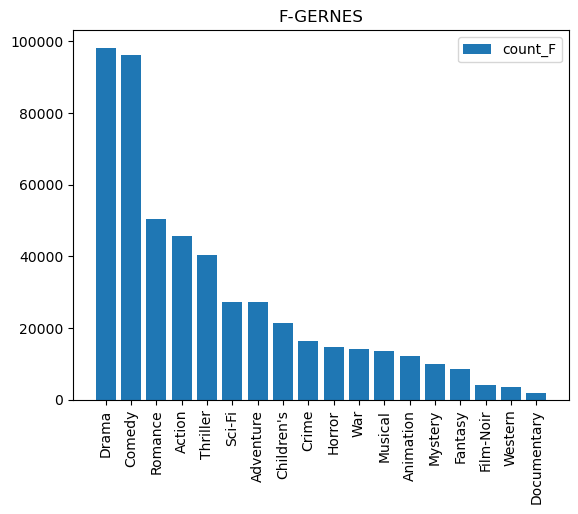

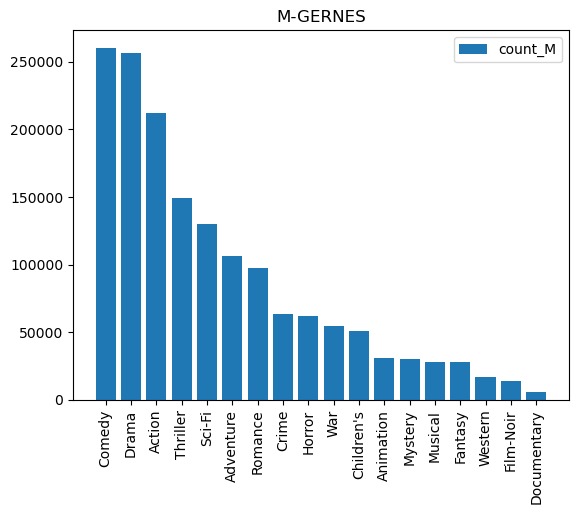

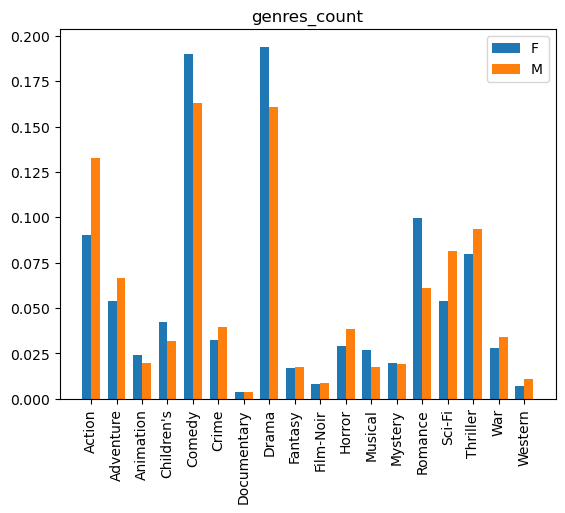

In [76]:
# 可视化
plt.subplot()
plt.bar(count_F.index,count_F.to_list(),label='count_F')
plt.title("F-GERNES")
plt.xticks(rotation=90)
plt.legend()
plt.show()

plt.subplot()
plt.bar(count_M.index,count_M.to_list(),label='count_M')
plt.title("M-GERNES")
plt.xticks(rotation=90)
plt.legend()
plt.show()

plt.subplot()
x=np.arange(len(count_F_normalized.to_list()))
width=0.35
count_F_normalized=count_F_normalized.sort_index()
count_M_normalized=count_M_normalized.sort_index()
p1=plt.bar(x-width/2,count_F_normalized.to_list(),label="F",width=width)
p2=plt.bar(x+width/2,count_M_normalized.to_list(),label="M",width=width)
plt.title("genres_count")
plt.xticks(x,labels=count_F_normalized.index,rotation=90)
plt.legend()
plt.show()



#### Task2：

在movielens 1M的数据集上，通过观影及评分信息，预测观众的年龄-性别

需要完成：

拆分训练集-测试集（20%评测），实现评测方案（准确率-召回率）

实现分类器模型，对观影数超过100的用户进行预测。调整模型及参数。包括并不限于特征降维来获得较好的效果。（提示：在用户年龄预测问题中，由于年

龄段本身是具有序关系的。常规的模型优化方法不一定会有明显的效果， 有兴趣的同学可以看一下ordinal regression模型。有余力可以尝试，不算分。）


In [77]:
# 导入常用库
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, recall_score

In [78]:
# 综合信息

## 将所有信息综合在一起
data=pd.merge(pd.merge(ratings,users,on='user_id'),movies,on='movie_id')
print(data.shape)
## 选出观影数大于 100 的用户
user_rating_count=data['user_id'].value_counts()
active_users=user_rating_count[user_rating_count>100].index
data=data[data['user_id'].isin(active_users)]

(1000209, 10)


In [79]:
# 数据预处理

## 将电影的种类，年龄段和观众的性别编码为数值
label_encoder = LabelEncoder()

### 编码性别
data["gender"] = label_encoder.fit_transform(data["gender"])

### 先将每部电影的种类分解，再对每个分解后的特征编码为二进制，最后将得到的数值向量拼接回数据矩阵用于训练模型
genres = set()
for movie_genres in data["genres"].str.split("|"):
    genres.update(movie_genres)
genres = sorted(genres)
for genre in genres:
    data[genre] = data["genres"].str.contains(genre).astype(int)

### 对年龄段做有序映射
agedesc_map={'Under 18':0,'18-24':1,'25-34':2,'35-44':3,'45-49':4,'50-55':5,'56+':6}
agedesc_inv_map=['Under 18','18-24','25-34','35-44','45-49','50-55','56+']
mapped_age=data['age_desc'].apply(lambda x:agedesc_map[str(x).strip()])
mapped_age.name='mapped_age'


## 将映射后的特征值拼接回矩阵中
data = pd.concat([data, mapped_age], axis=1)

### 以评分和电影种类的编码向量作为判断依据，将用户性别和年龄段映射值作为预测目标
features=["rating"]+list(genres)
target=["mapped_age","gender"]
data=data.sort_values(by='user_id')
display(data)


user_id  movie_id  rating  timestamp  gender zipcode age_desc  \
1             2      1193       5  978298413       1   70072      56+   
68284         2      2916       3  978299809       1   70072      56+   
166809        2      3451       4  978298924       1   70072      56+   
167159        2      3095       4  978298517       1   70072      56+   
70280         2      3468       5  978298542       1   70072      56+   
...         ...       ...     ...        ...     ...     ...      ...   
73612      6040      1210       2  956715805       1   11106    25-34   
693413     6040      2648       4  957717423       1   11106    25-34   
478349     6040       916       5  957717557       1   11106    25-34   
262996     6040       162       4  956704953       1   11106    25-34   
265158     6040      3016       2  956716157       1   11106    25-34   

                  occ_desc                                              title  \
1            self-employed             One Flew Over the Cuckoo's Nest (1975)   
68284        self-employed                                Total Recall (1990)   
166809       self-employed                Guess Who's Coming to Dinner (1967)   
167159       self-employed                        Grapes of Wrath, The (1940)   
70280        self-employed                                Hustler, The (1961)   
...                    ...                                                ...   
73612   doctor/health care  Star Wars: Episode VI - Return of the Jedi (1983)   
693413  doctor/health care                                Frankenstein (1931)   
478349  doctor/health care                               Roman Holiday (1953)   
262996  doctor/health care                                       Crumb (1994)   
265158  doctor/health care                                   Creepshow (1982)   

                                     genres  ...  Film-Noir  Horror  Musical  \
1                                     Drama  ...          0       0        0   
68284      Action|Adventure|Sci-Fi|Thriller  ...          0       0        0   
166809                         Comedy|Drama  ...          0       0        0   
167159                                Drama  ...          0       0        0   
70280                                 Drama  ...          0       0        0   
...                                     ...  ...        ...     ...      ...   
73612   Action|Adventure|Romance|Sci-Fi|War  ...          0       0        0   
693413                               Horror  ...          0       1        0   
478349                       Comedy|Romance  ...          0       0        0   
262996                          Documentary  ...          0       0        0   
265158                               Horror  ...          0       1        0   

        Mystery  Romance  Sci-Fi  Thriller  War  Western  mapped_age  
1             0        0       0         0    0        0           6  
68284         0        0       1         1    0        0           6  
166809        0        0       0         0    0        0           6  
167159        0        0       0         0    0        0           6  
70280         0        0       0         0    0        0           6  
...         ...      ...     ...       ...  ...      ...         ...  
73612         0        1       1         0    1        0           2  
693413        0        0       0         0    0        0           2  
478349        0        1       0         0    0        0           2  
262996        0        0       0         0    0        0           2  
265158        0        0       0         0    0        0           2  

[843702 rows x 29 columns]

In [80]:
# 提取某个用户的所有特征
def extract_user_features(user_data):
    user_features=[]
    
    # age
    age=user_data["mapped_age"].iloc[0]
    # gender
    gender=user_data["gender"].iloc[0]

    # Genres
    genres_features=user_data[genres].sum().tolist()
    user_features.extend(genres_features)
    
    # ratings
    data_copy=user_data.copy()
    data_copy["genres"]=data_copy["genres"].str.split('|')
    data_copy=data_copy.explode("genres")
    rating_features=data_copy.groupby("genres")["rating"].mean()
    for id in genres:
        if id not in rating_features.index:
            rating_features[str(id)]=0
    rating_features=rating_features.sort_index()
    user_features.extend(list(rating_features))

    return (user_features,age,gender)

# 提取所有用户的特征值，作为训练数据
def extract_features(data):
    user_features=[]
    ages=[]
    genders=[]
    for user_id,user_data in data.groupby("user_id"):
        features,age,gender=extract_user_features(user_data)
        user_features.append(features)
        ages.append(age)
        genders.append(gender)
    return (user_features,ages,genders)

In [81]:

# 得到的特征向量和预测目标值作为训练模型的 X 和 y
train_data,test_data=train_test_split(data,test_size=0.2,random_state=42)
X_train,Y_train_age,Y_train_gender=extract_features(train_data)
X_test,Y_test_age,Y_test_gender=extract_features(train_data)


In [82]:
# PCA 降维
pca=PCA(n_components=35,random_state=42)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test)

In [83]:

# 训练分类器
clf_gender=SVC(random_state=42)
clf_gender.fit(X_train_pca,Y_train_gender)

clf_age = SVC(random_state=42)
clf_age.fit(X_train_pca, Y_train_age)

SVC(random_state=42)

In [84]:
# 预测结果
y_pred_gender=clf_gender.predict(X_test_pca)
y_pred_age=clf_age.predict(X_test_pca)

In [85]:
# 测评准确率
print(f"Accuracy score GENDER: {accuracy_score(Y_test_gender, y_pred_gender)}")
print(f"Recall score GENDER:{recall_score(Y_test_gender,y_pred_gender,average='weighted')}")

print(f"Accuracy score AGE: {accuracy_score(Y_test_age, y_pred_age)}")
print(f"Recall score AGE:{recall_score(Y_test_age,y_pred_age,average='weighted')}")

Accuracy score GENDER: 0.8198693709178412
Recall score GENDER:0.8198693709178412
Accuracy score AGE: 0.40391887246476454
Recall score AGE:0.40391887246476454


### Task 3
在movielens 1M的数据集上，通过观影-评分及电影简介等信息，对观影>100的用户实现用户画像。

包括且不限于：最喜欢-最不喜欢的电影类型。输出3-5部代表性的电影反映该用户的观影偏好。（可以通过对偏好的电影集合运用图分析技术或SVD分解来实现）

⾃定义⼀些合理的类型概 念，如，家庭主妇最爱，烧脑神剧等，对用户进行标签标记。或者综合电影风格，生成用户观影偏好的雷达图。生成用户偏好词云
等。
